# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [2]:
# TODO: Load the three CSV files into dataframes
# provider_df = pd.read_csv(...)
provider_df = pd.read_csv('data/provider_data.csv')
# facility_df = pd.read_csv(...)
facility_df = pd.read_csv('data/facility_data.csv')
# encounter_df = pd.read_csv(...)
encounter_df = pd.read_csv('data/encounter_data.csv')

# TODO: Print the shapes of each dataframe
# print("Provider data shape:", ...)
print("Provider data shape:", provider_df.shape)
# print("Facility data shape:", ...)
print("Facility data shape:", facility_df.shape)
# print("Encounter data shape:", ...)
print("Encounter data shape:", encounter_df.shape)
# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'

merged_df = encounter_df.merge(provider_df, on='provider_id', how='left')

#print([repr(col) for col in facility_df.columns])
second_merged_df =merged_df.merge(facility_df, left_on='facility_id_x', right_on ='facility_id', how ='left')

# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed
second_merged_df = second_merged_df.drop(columns=['facility_id_y', 'region_y'])
#rename
second_merged_df = second_merged_df.rename(columns={'facility_id_x':'facility_id', 'region_x': 'region'})
# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", second_merged_df.shape)
# print("\nMerged data shape:", ...)
# print("\nColumns:", ...)
print ("\nColumns in merged DataFrame:")
#print(second_merged_df.columns)
# print("\nFirst few rows:")
print("\nFirst few rows:")
#print(second_merged_df.head())
# print(...)

#enoticed that facility_id was present 2x even after dropping 
second_merged_df =second_merged_df.loc[:, ~second_merged_df.columns.duplicated()]
print(second_merged_df.columns)
print(second_merged_df.head())

Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 22)

Columns in merged DataFrame:

First few rows:
Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date'],
      dtype='object')
  encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encoun

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [3]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# TODO: Calculate mean, sum, count for years_experience by facility
# TODO: Calculate total encounter charges by facility
# TODO: Calculate total insurance payments by facility
# TODO: Find the facility with highest total encounter charges
grouped = second_merged_df.groupby ('facility_id').agg({
    'years_experience': ['mean','sum', 'count'],
    'service_charge' : 'sum',
    'insurance_paid' : 'sum' 
}).reset_index()

# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid
summary_df = (second_merged_df.groupby(['facility_id', 'facility_name']).agg(
    total_providers=('provider_id', 'nunique'),
    average_years_experience=('years_experience', 'mean'),
    total_service_charge=('service_charge', 'sum'),
    total_insurance_paid=('insurance_paid', 'sum')
).reset_index())
print(summary_df.head())

# TODO: Save the summary dataframe as 'output/q2_groupby_analysis.csv
summary_df.to_csv('output/q1_groupby_analysis.csv', index=False)


  facility_id                facility_name  total_providers  \
0      FAC001        City General Hospital              312   
1      FAC002      Community Health Clinic              328   
2      FAC003      Regional Medical Center              309   
3      FAC004        Northside Urgent Care              305   
4      FAC005  Cardiology Specialty Center              297   

   average_years_experience  total_service_charge  total_insurance_paid  
0                 19.563008             295508.13             236798.50  
1                 20.160784             334992.21             269207.92  
2                 20.209205             316284.98             251750.43  
3                 20.137014             297283.06             236839.71  
4                 19.319728             276658.83             222139.04  


### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [4]:
# TODO: Add facility mean years_experience as new column
second_merged_df['facility_mean_experience']=second_merged_df.groupby('facility_id')['years_experience'].transform('mean')

# TODO: Add facility standard deviation of years_experience
second_merged_df['facility_sd_experience']=second_merged_df.groupby('facility_id')['years_experience'].transform('std')
# TODO: Create normalized years_experience (z-score within facility)
second_merged_df['z_score_experience']= (
    (second_merged_df['years_experience'] - second_merged_df['facility_mean_experience'])/
    second_merged_df['facility_sd_experience'])
# TODO: Add facility total encounter charges as new column
second_merged_df['facility_total_charge']=second_merged_df.groupby('facility_id')['service_charge'].transform('sum')

# TODO: Display the enhanced dataframe

print(second_merged_df.head())

# TODO: Save results as 'output/q1_aggregation_report.txt'
second_merged_df.to_csv('output/q1_aggregation_report.txt', index=False)

  encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_code  procedure_code  service_charge  \
0          Office Visit          M79.3           99213          345.03   
1             Inpatient          N18.9           85025          550.48   
2                   Lab          K21.9           80053          149.84   
3  Outpatient Procedure          H52.9           70450         1468.48   
4             Emergency          G43.9           99214          672.23   

   insurance_paid  ...  years_experience license_number  \
0          290.33  ...                11      LIC000259   
1          482.51  ...      

## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [5]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
filter_1 =summary_df.groupby(['facility_id', 'facility_name']).filter(lambda x: x['total_providers'].sum() > 20)
print("Facilities  with sufficient providers:")
print(filter_1)

# TODO: Filter facilities with average years_experience > 10 (experienced staff)
filter_2 =summary_df.groupby(['facility_id', 'facility_name']).filter(lambda x: x['average_years_experience'].sum() > 10)
print("Facilities  with experienced staff:")
print(filter_2)
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
filter_3 =summary_df.groupby(['facility_id', 'facility_name']).filter(lambda x: x['total_service_charge'].sum() > 10)
print("Facilities  with high volume:")
print(filter_3)
# TODO: Create a summary of filtered results
summary2_df = (summary_df.groupby(['facility_id', 'facility_name']).agg(
    sufficient_staffing=('total_providers', 'sum'),
    experienced_staff=('average_years_experience', 'sum'),
    high_volum=('total_service_charge', 'sum'),
).reset_index())
print(summary2_df.head())

# TODO: Save result as 'output/q2_filter_analysis.csv'
summary2_df.to_csv('output/q2_filter_analysis.csv', index=False)

Facilities  with sufficient providers:
  facility_id                facility_name  total_providers  \
0      FAC001        City General Hospital              312   
1      FAC002      Community Health Clinic              328   
2      FAC003      Regional Medical Center              309   
3      FAC004        Northside Urgent Care              305   
4      FAC005  Cardiology Specialty Center              297   
5      FAC006    Oncology Treatment Center              324   
6      FAC007        Pediatric Care Center              326   
7      FAC008     Emergency Medical Center              299   
8      FAC009          Primary Care Clinic              316   
9      FAC010    Surgical Specialty Center              340   

   average_years_experience  total_service_charge  total_insurance_paid  
0                 19.563008             295508.13             236798.50  
1                 20.160784             334992.21             269207.92  
2                 20.209205             31628

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [6]:
provider_counts = second_merged_df.groupby([ 'provider_id','provider_name','years_experience','specialty'])['encounter_id'].count().reset_index(name='encounter_count')
print(provider_counts)


    provider_id     provider_name  years_experience         specialty  \
0        PR0001        Sam Wilson                20  General Practice   
1        PR0002    Quinn Anderson                17         Neurology   
2        PR0003   Taylor Anderson                 7        Pediatrics   
3        PR0004       Jamie Brown                 4     Endocrinology   
4        PR0005  Cameron Williams                29       Dermatology   
..          ...               ...               ...               ...   
495      PR0496   Cameron Johnson                29       Orthopedics   
496      PR0497        Sam Garcia                10     Endocrinology   
497      PR0498     Drew Williams                 2       Dermatology   
498      PR0499       Quinn Jones                11        Pediatrics   
499      PR0500     Morgan Wilson                13  General Practice   

     encounter_count  
0                 10  
1                 10  
2                 16  
3                  9  
4       

In [7]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    return pd.Series({
        'mean_years_experience': group['years_experience'].mean(),
        'std_years_experience': group['years_experience'].std(),
        'min_years_experience':  group['years_experience'].min(),
        'max_years_experience':  group['years_experience'].max(),
        'range_years_experience': group['years_experience'].max() - group['years_experience'].min()
    })
    pass
print("Custom provider statistics by years_experience:")
print(second_merged_df.groupby('provider_id').apply(provider_stats))

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = second_merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)
print("Custom facility provider statistics by years_experience:")
# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty

    provider_counts = second_merged_df.groupby([ 'provider_id','provider_name','years_experience','specialty'])['encounter_id'].count().reset_index(name='encounter_count')
    return provider_counts.nlargest(n, 'encounter_count')[['provider_id','provider_name','years_experience','specialty','encounter_count']]
    pass                                      

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = second_merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column
print(top_providers_by_facility)
# TODO: Save results as 'output/q2_performance_report.txt'
top_providers_by_facility.to_csv('output/q2_performance_report.txt', index=False)


Custom provider statistics by years_experience:
             mean_years_experience  std_years_experience  \
provider_id                                                
PR0001                        20.0                   0.0   
PR0002                        17.0                   0.0   
PR0003                         7.0                   0.0   
PR0004                         4.0                   0.0   
PR0005                        29.0                   0.0   
...                            ...                   ...   
PR0496                        29.0                   0.0   
PR0497                        10.0                   0.0   
PR0498                         2.0                   0.0   
PR0499                        11.0                   0.0   
PR0500                        13.0                   0.0   

             min_years_experience  max_years_experience  \
provider_id                                               
PR0001                       20.0                  20

/tmp/ipykernel_218367/3674476017.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(second_merged_df.groupby('provider_id').apply(provider_stats))
/tmp/ipykernel_218367/3674476017.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = second_merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [8]:
# TODO: Group by facility type and region
hierarchical_grouped = second_merged_df.groupby(['facility_type', 'region'])
# TODO: Calculate statistics for each facility_type-region 
hierarchical_stats = second_merged_df.groupby(['facility_type', 'region']).agg (
    total_encounters=('encounter_id', 'count'),
    unique_providers=('provider_id', 'nunique'),
    unique_specialty=('specialty', 'nunique'),
    avg_years=('years_experience', 'mean'),
    max_experience= ('years_experience', 'max'),
    min_experience= ('years_experience', 'min')
).reset_index()
print("Hierarchical stats:")
print(hierarchical_stats.columns)
print(hierarchical_stats.head())
# TODO: Use unstack to convert to wide format
wide_format = hierarchical_stats.set_index(['facility_type', 'region']).unstack()
print("\nWide format:")
print(wide_format)
# TODO: Use stack to convert back to long format
#long_format = hierarchical_stats.set_index(['facility_type', 'region']).stack()
long_format = wide_format.stack().reset_index()
print("\nLong format:")
print(long_format)
# TODO: Analyze the hierarchical structure
top_combinations = hierarchical_stats.sort_values('avg_years', ascending=False).head(5)
hierarchical_stats['unique_specialty'].sort_values(ascending=False)
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
hierarchical_stats.to_csv('output/q2_hierarchical_analysis.csv', index=False)


Hierarchical stats:
Index(['facility_type', 'region', 'total_encounters', 'unique_providers',
       'unique_specialty', 'avg_years', 'max_experience', 'min_experience'],
      dtype='object')
      facility_type region  total_encounters  unique_providers  \
0          Hospital  South               509               324   
1  Specialty Center  South              1026               424   
2  Specialty Center   West               946               427   
3       Urgent Care  North               510               328   
4       Urgent Care  South               970               430   

   unique_specialty  avg_years  max_experience  min_experience  
0                12  19.381139              39               1  
1                12  19.742690              39               1  
2                12  19.737844              39               1  
3                12  20.160784              39               1  
4                12  19.881443              39               1  

Wide format:
      

/tmp/ipykernel_218367/1363239936.py:21: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long_format = wide_format.stack().reset_index()


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [9]:
# TODO: Create pivot table: encounter charges by procedure code and region
# Basic pivot table
pivot_1 = pd.pivot_table(
    second_merged_df, 
    values='service_charge', 
    index='procedure_code', 
    columns='region', 
    aggfunc='sum'
)
print("Encounter charges by procedure and Region:")
print(pivot_1)
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
pivot_multi = pd.pivot_table(
    second_merged_df, 
    values='service_charge', 
    index='procedure_code', 
    columns='region', 
    aggfunc=['sum', 'mean', 'count'])

print("\nMultiple Aggregations:")
print(pivot_multi)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value
advanced_pivot = pd.pivot_table(
    second_merged_df, 
    values='service_charge', 
    index='procedure_code', 
    columns='region', 
    aggfunc='sum',
    margins=True,
    margins_name='Total',
    fill_value=0
)
print("Advanced pivot with totals:")
print(advanced_pivot)

# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
advanced_pivot.to_csv('output/q3_pivot_analysis.csv')
pivot_loaded = pd.read_csv('output/q3_pivot_analysis.csv', index_col=0)

Encounter charges by procedure and Region:
region             North      South       West
procedure_code                                
36415           12130.35   57836.97   48458.05
70450           90236.85  375893.20  312204.53
70551           52844.83  234817.26  160891.32
72040           11463.33   81039.58   56599.39
80053           14798.09   83849.78   58540.39
85025            8946.57   48989.64   40769.13
93000            6743.28   55873.35   45845.38
99213           62143.42  327262.66  259242.79
99214           71684.08  322532.05  240095.41
99283            4001.41   31172.21   24520.39

Multiple Aggregations:
                     sum                               mean               \
region             North      South       West        North        South   
procedure_code                                                             
36415           12130.35   57836.97   48458.05   466.551923   416.093309   
70450           90236.85  375893.20  312204.53  3222.744643  2665

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [10]:
# TODO: Create crosstab of facility type vs region with counts
#import pandas as pd
facility_region_counts = pd.crosstab(
    index= second_merged_df['facility_type'],
    columns =  second_merged_df['region'],
)
print(facility_region_counts)
# TODO: Create crosstab with margins (row and column totals)
facility_region_counts_margins= pd.crosstab(
    index= second_merged_df['facility_type'],
    columns =  second_merged_df['region'],
    margins=True,
    margins_name='Total'
)
print("n\Counts with row and column totals:")
print(facility_region_counts_margins)

# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
facility_encounter_region_counts= pd.crosstab(
    index= [second_merged_df['facility_type'], second_merged_df['encounter_type']],
    columns =  second_merged_df['region'],
)
print("n\Counts Multi-dimensional:")
print(facility_encounter_region_counts)

# TODO: Analyze the cross-tabulation results
facility_encounter_region_counts_margins= pd.crosstab(
    index= [second_merged_df['facility_type'], second_merged_df['encounter_type']],
    columns =  second_merged_df['region'],
    margins=True,
    margins_name='Total'
)
print("n\Margins-Counts Multi-dimensional:")
print(facility_encounter_region_counts_margins)

# TODO: Save results as 'output/q3_crosstab_analysis.csv'
facility_encounter_region_counts_margins.to_csv('output/q3_crosstab_analysis.csv')



region            North  South  West
facility_type                       
Hospital              0    509     0
Specialty Center      0   1026   946
Urgent Care         510    970  1039
n\Counts with row and column totals:
region            North  South  West  Total
facility_type                              
Hospital              0    509     0    509
Specialty Center      0   1026   946   1972
Urgent Care         510    970  1039   2519
Total               510   2505  1985   5000
n\Counts Multi-dimensional:
region                                 North  South  West
facility_type    encounter_type                          
Hospital         Emergency                 0    127     0
                 Inpatient                 0     95     0
                 Lab                       0    100     0
                 Office Visit              0     85     0
                 Outpatient Procedure      0    102     0
Specialty Center Emergency                 0    236   182
                 Inpat

<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:24: SyntaxWarning: invalid escape sequence '\C'
<>:34: SyntaxWarning: invalid escape sequence '\M'
<>:15: SyntaxWarning: invalid escape sequence '\C'
<>:24: SyntaxWarning: invalid escape sequence '\C'
<>:34: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipykernel_218367/695136202.py:15: SyntaxWarning: invalid escape sequence '\C'
  print("n\Counts with row and column totals:")
/tmp/ipykernel_218367/695136202.py:24: SyntaxWarning: invalid escape sequence '\C'
  print("n\Counts Multi-dimensional:")
/tmp/ipykernel_218367/695136202.py:34: SyntaxWarning: invalid escape sequence '\M'
  print("n\Margins-Counts Multi-dimensional:")


n\Margins-Counts Multi-dimensional:
region                                 North  South  West  Total
facility_type    encounter_type                                 
Hospital         Emergency                 0    127     0    127
                 Inpatient                 0     95     0     95
                 Lab                       0    100     0    100
                 Office Visit              0     85     0     85
                 Outpatient Procedure      0    102     0    102
Specialty Center Emergency                 0    236   182    418
                 Inpatient                 0    210   191    401
                 Lab                       0    211   180    391
                 Office Visit              0    175   200    375
                 Outpatient Procedure      0    194   193    387
Urgent Care      Emergency               109    190   195    494
                 Inpatient                90    190   201    481
                 Lab                      90    229   

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

/workspaces/ds217-08-group-filter-and-flow-Ravi2164


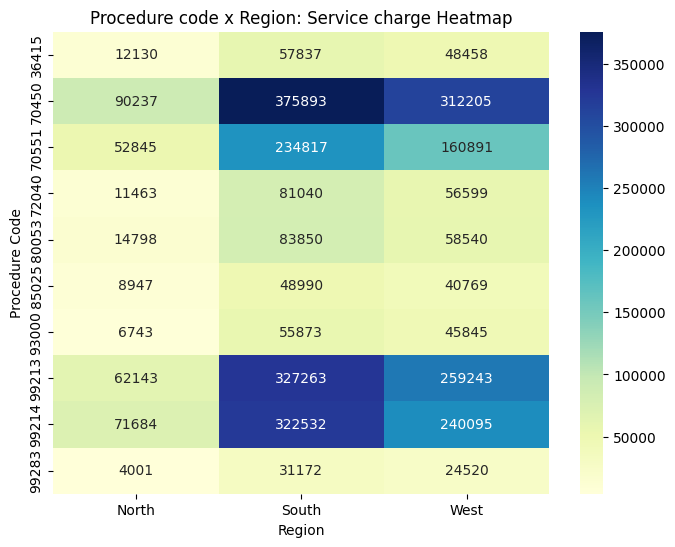

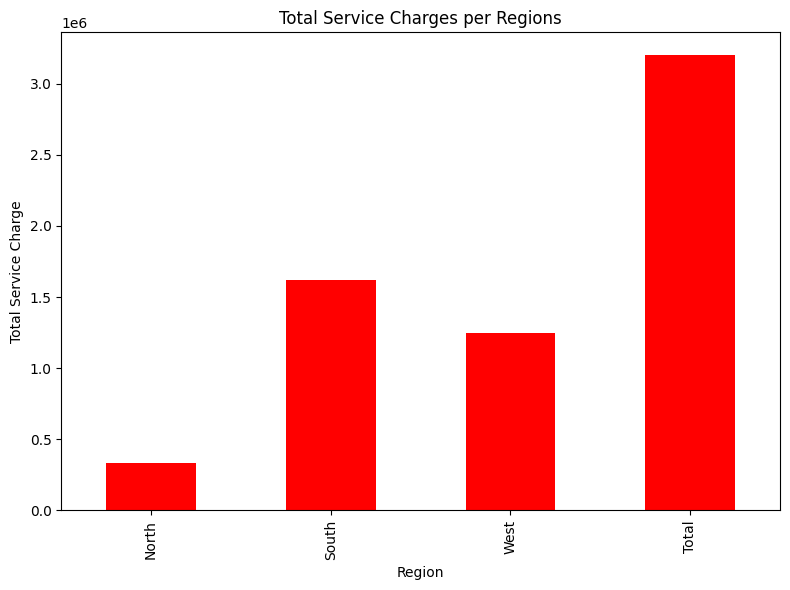

In [13]:
# TODO: Create heatmap from pivot table
import os
print(os.getcwd())
pivot_loaded = pd.read_csv('output/q3_pivot_analysis.csv', index_col=0)
heatmap_data = advanced_pivot.drop('Total', axis=0, errors='ignore')
heatmap_data = heatmap_data.drop('Total', axis=1, errors ='ignore')  
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu"
)
plt.title("Procedure code x Region: Service charge Heatmap")  
plt.ylabel("Procedure Code")
plt.xlabel("Region")
plt.show()   
                  
# TODO: Create bar chart from pivot table
# TODO: Customize colors and styling
# TODO: Add appropriate titles and labels
regions_totals = advanced_pivot.drop('Total', axis=0, errors='ignore').sum(axis=0)
regions_totals.plot(kind='bar', figsize=(8, 6), color='red')
plt.title("Total Service Charges per Regions")  
plt.ylabel("Total Service Charge")
plt.xlabel("Region")
# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.tight_layout()
plt.savefig("output/q3_pivot_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques